# Exercício Busca em Grafos

Neste exercício simples, apresentamos um grafo de exemplo e realizamos buscas utilizando: BFS, DFS, Greedy e A*.

In [1]:
graph = {
    'Start': {'A': 2, 'B': 3, 'D': 5},
    'A': {'C': 4, 'Start': 2},
    'B': {'D': 4, 'Start': 3},
    'C': {'D': 1, 'A': 4, 'Goal': 2},
    'D': {'Start': 5, 'B': 4, 'C': 1, 'Goal': 5},
    'Goal': {}
}

heuristics = {
    'Start': 0,  # Valor heurístico para a busca gulosa e A* (0 para o nó inicial)
    'A': 2,
    'B': 5,
    'C': 2,
    'D': 1,
    'Goal': 0  # Valor heurístico para o nó objetivo (geralmente 0 em heurísticas admissíveis)
}

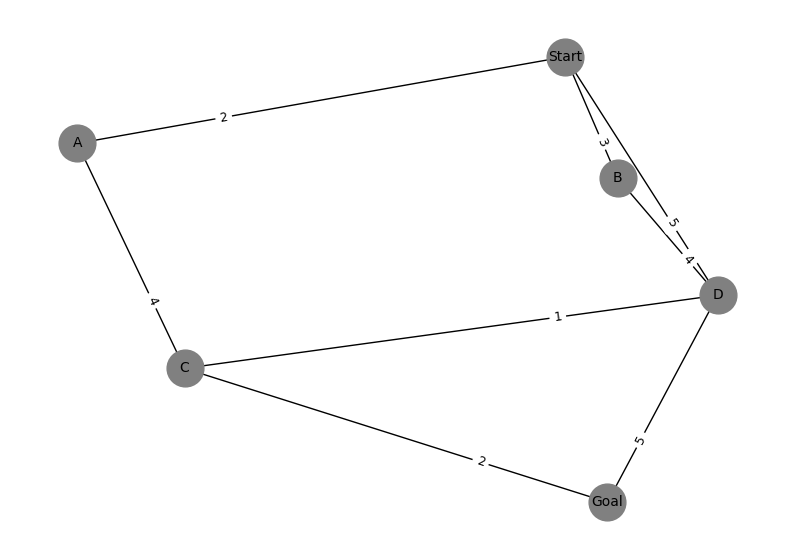

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria um objeto Graph da NetworkX
G = nx.Graph()

# Adiciona os nós ao grafo
for node in graph.keys():
    G.add_node(node)

# Adiciona as arestas ao grafo com pesos
for node, edges in graph.items():
    for adjacent_node, weight in edges.items():
        G.add_edge(node, adjacent_node, weight=weight)

# Desenha o grafo
pos = nx.spring_layout(G)  # Posicionamento automático dos nós
edge_labels = nx.get_edge_attributes(G, 'weight')  # Pega os pesos para as arestas

# Define o tamanho da figura
plt.figure(figsize=(10, 7))

# Desenha os nós
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='gray')

# Desenha as arestas
nx.draw_networkx_edges(G, pos)

# Desenha os rótulos dos nós
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Desenha os rótulos das arestas (os pesos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=9)

# Remove os eixos
plt.axis('off')

# Exibe o grafo
plt.show()

In [3]:
from collections import deque

def bfs(graph, start, goal):
    explored = []
    queue = deque([start])
    path = {start: [start]} 

    while queue:
        node = queue.popleft()
        if node == goal:
            return explored, path[node] 
        if node not in explored:
            explored.append(node)
            neighbours = sorted(list(graph[node].keys())) 
            for neighbour in neighbours:
                if neighbour not in explored:
                    queue.append(neighbour)
                    if neighbour not in path:
                        path[neighbour] = path[node] + [neighbour]
        print(f"scope: {node}\tqueue: {list(queue)}")
    
    return explored, []

bfs_explored, bfs_path = bfs(graph, 'Start', 'Goal')
print(f"\nexplored: {bfs_explored}")
print(f"path: {bfs_path}")

scope: Start	queue: ['A', 'B', 'D']
scope: A	queue: ['B', 'D', 'C']
scope: B	queue: ['D', 'C', 'D']
scope: D	queue: ['C', 'D', 'C', 'Goal']
scope: C	queue: ['D', 'C', 'Goal', 'Goal']
scope: D	queue: ['C', 'Goal', 'Goal']
scope: C	queue: ['Goal', 'Goal']

explored: ['Start', 'A', 'B', 'D', 'C']
path: ['Start', 'D', 'Goal']


In [4]:
def dfs(graph, start, goal):
    explored = []
    stack = [start]
    path = {start: [start]}  

    while stack:
        node = stack.pop()
        if node == goal:
            return explored, path[node]  
        if node not in explored:
            explored.append(node)
            neighbours = sorted(list(graph[node].keys()), reverse=True)  
            for neighbour in neighbours:
                if neighbour not in explored:
                    stack.append(neighbour)
                    if neighbour not in path:
                        path[neighbour] = path[node] + [neighbour]
        print(f"scope: {node}\tstack: {stack}")

    return explored, []

dfs_explored, dfs_path = dfs(graph, 'Start', 'Goal')
print(f"\nexplored: {dfs_explored}")
print(f"path: {dfs_path}")

scope: Start	stack: ['D', 'B', 'A']
scope: A	stack: ['D', 'B', 'C']
scope: C	stack: ['D', 'B', 'Goal', 'D']
scope: D	stack: ['D', 'B', 'Goal', 'Goal', 'B']
scope: B	stack: ['D', 'B', 'Goal', 'Goal']

explored: ['Start', 'A', 'C', 'D', 'B']
path: ['Start', 'A', 'C', 'Goal']


In [5]:
import heapq

def greedy_best_first_search(graph, heuristics, start, goal):
    explored = []
    priority_queue = [(heuristics[start], start)]
    path = {start: [start]}  

    while priority_queue:
        _, node = heapq.heappop(priority_queue)
        if node == goal:
            return explored, path[node]  
        if node not in explored:
            explored.append(node)
            neighbours = sorted(graph[node], key=lambda x: heuristics[x])  
            for neighbour in neighbours:
                if neighbour not in explored:
                    heapq.heappush(priority_queue, (heuristics[neighbour], neighbour))
                    if neighbour not in path:
                        path[neighbour] = path[node] + [neighbour]
        print(f"scope: {node}\tpriority queue: {priority_queue}")

    return explored, []

greedy_explored, greedy_path = greedy_best_first_search(graph, heuristics, 'Start', 'Goal')

print(f"\nexplored: {greedy_explored}")
print(f"path: {greedy_path}")

scope: Start	priority queue: [(1, 'D'), (2, 'A'), (5, 'B')]
scope: D	priority queue: [(0, 'Goal'), (2, 'C'), (2, 'A'), (5, 'B'), (5, 'B')]

explored: ['Start', 'D']
path: ['Start', 'D', 'Goal']


In [6]:
def a_star_search(graph, heuristics, start, goal):
    explored = []
    priority_queue = [(heuristics[start], start)]
    path = {start: [start]}  
    path_cost = {start: 0}  

    while priority_queue:
        _, node = heapq.heappop(priority_queue)
        if node == goal:
            return explored, path[node]  
        if node not in explored:
            explored.append(node)
            for neighbour, cost in graph[node].items():
                new_cost = path_cost[node] + cost
                if neighbour not in path_cost or new_cost < path_cost[neighbour]:
                    path_cost[neighbour] = new_cost
                    priority = new_cost + heuristics[neighbour]
                    heapq.heappush(priority_queue, (priority, neighbour))
                    path[neighbour] = path[node] + [neighbour]
        print(f"scope: {node}\tpriority queue: {priority_queue}")

    return explored, []

a_star_explored, a_star_path = a_star_search(graph, heuristics, 'Start', 'Goal')

print(f"\nexplored: {a_star_explored}")
print(f"path: {a_star_path}")

scope: Start	priority queue: [(4, 'A'), (8, 'B'), (6, 'D')]
scope: A	priority queue: [(6, 'D'), (8, 'B'), (8, 'C')]
scope: D	priority queue: [(8, 'B'), (8, 'C'), (10, 'Goal')]
scope: B	priority queue: [(8, 'C'), (10, 'Goal')]
scope: C	priority queue: [(8, 'Goal'), (10, 'Goal')]

explored: ['Start', 'A', 'D', 'B', 'C']
path: ['Start', 'A', 'C', 'Goal']
